Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [7]:
X = customer_data.iloc[:,[3,4]].values


In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [10]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

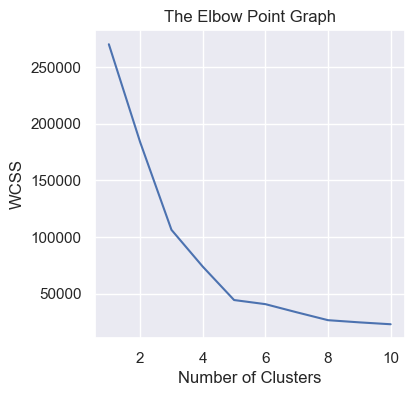

In [16]:
# plot an elbow graph

sns.set()
plt.figure(figsize=(4,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Cluster

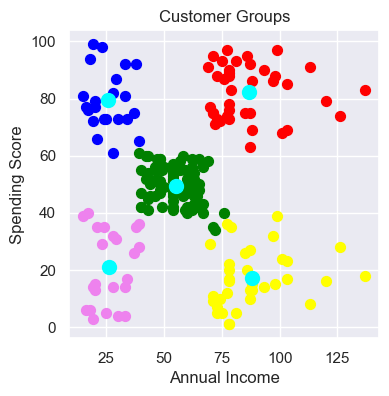

In [14]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train the model on the training set
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(X_train)

# Predict cluster labels for both train and test sets
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Calculate silhouette scores for both sets
train_silhouette_score = silhouette_score(X_train, train_labels)
test_silhouette_score = silhouette_score(X_test, test_labels)

print(f'Train Silhouette Score: {train_silhouette_score}')
print(f'Test Silhouette Score: {test_silhouette_score}')


Train Silhouette Score: 0.4598878984782818
Test Silhouette Score: 0.43493674577314856


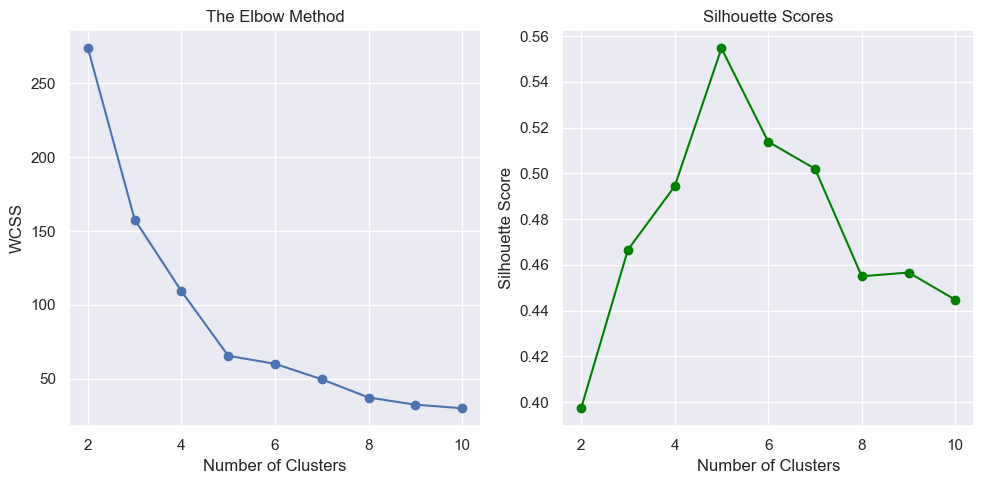

Optimal number of clusters based on silhouette score: 5
Final Silhouette Score: 0.5546571631111091


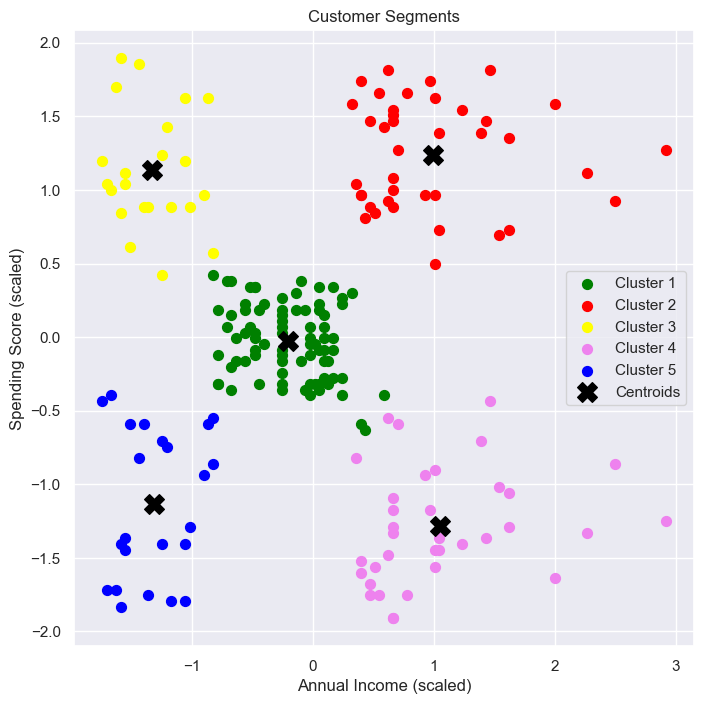

In [18]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the data
customer_data = pd.read_csv('Mall_Customers.csv')

# Checking for missing values
if customer_data.isnull().sum().sum() > 0:
    print("Missing values found. Cleaning the data...")
    customer_data.dropna(inplace=True)

# Selecting Annual Income and Spending Score columns
X = customer_data.iloc[:, [3, 4]].values

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using Silhouette Score and Elbow Method
wcss = []
silhouette_scores = []

for i in range(2, 11):  # Starting from 2 clusters for silhouette analysis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Optimum Number of Clusters based on maximum silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

# Training the K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_scaled)

# Silhouette Score for the final model
final_silhouette_score = silhouette_score(X_scaled, Y)
print(f"Final Silhouette Score: {final_silhouette_score}")

# Visualizing the clusters
plt.figure(figsize=(8, 8))
colors = ['green', 'red', 'yellow', 'violet', 'blue', 'orange', 'pink', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(X_scaled[Y == i, 0], X_scaled[Y == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


Best Silhouette Score with K-Means: 0.5546571631111091 (Clusters: 5)


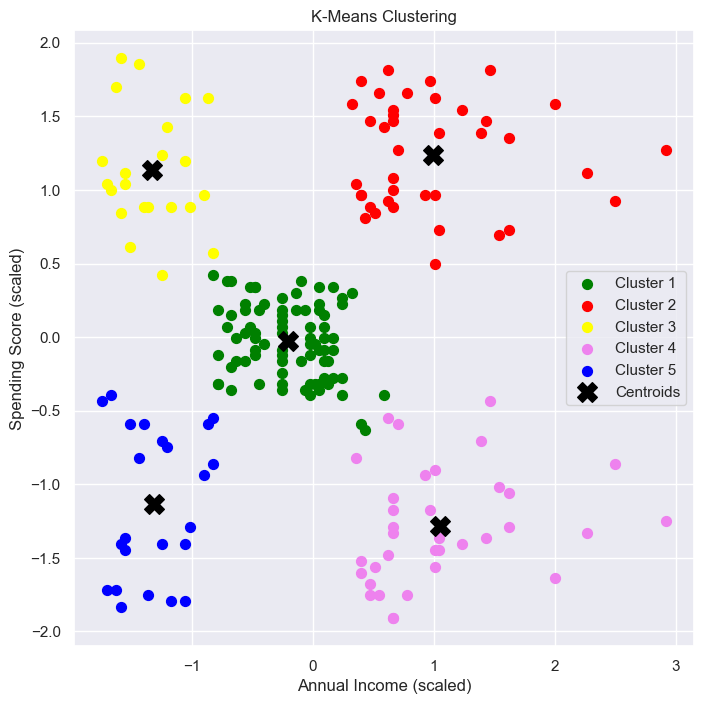

Best Silhouette Score with GMM: 0.5536892843811245 (Components: 5)


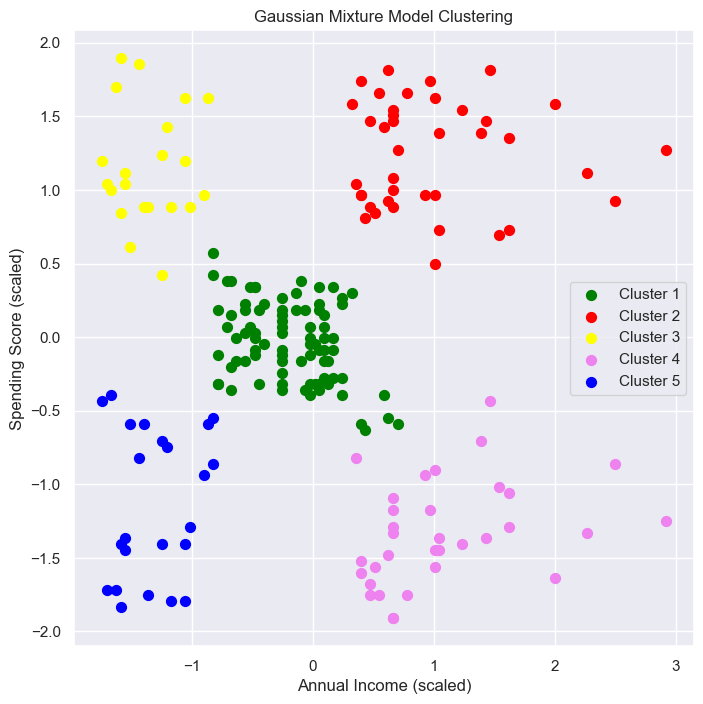

Silhouette Score with DBSCAN: 0.3875583892728279

--- Summary of Best Clustering Models ---
K-Means Best Score: 0.5546571631111091 with 5 clusters
GMM Best Score: 0.5536892843811245 with 5 components
DBSCAN Best Score: 0.3875583892728279


In [19]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Loading the data
customer_data = pd.read_csv('Mall_Customers.csv')

# Checking for missing values
if customer_data.isnull().sum().sum() > 0:
    print("Missing values found. Cleaning the data...")
    customer_data.dropna(inplace=True)

# Selecting Annual Income and Spending Score columns
X = customer_data.iloc[:, [3, 4]].values

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. K-Means Clustering with Silhouette Optimization ###
best_kmeans_score = 0
optimal_clusters_kmeans = 0

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_kmeans_score:
        best_kmeans_score = score
        optimal_clusters_kmeans = i

print(f"Best Silhouette Score with K-Means: {best_kmeans_score} (Clusters: {optimal_clusters_kmeans})")

# Visualizing the best K-Means clusters
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, init='k-means++', random_state=42)
Y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(4,4))
colors = ['green', 'red', 'yellow', 'violet', 'blue', 'orange', 'pink', 'cyan', 'magenta']
for i in range(optimal_clusters_kmeans):
    plt.scatter(X_scaled[Y_kmeans == i, 0], X_scaled[Y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

### 2. Gaussian Mixture Models (GMM) ###
best_gmm_score = 0
optimal_clusters_gmm = 0

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, gmm_labels)
    if score > best_gmm_score:
        best_gmm_score = score
        optimal_clusters_gmm = i

print(f"Best Silhouette Score with GMM: {best_gmm_score} (Components: {optimal_clusters_gmm})")

# Visualizing GMM Clusters
gmm = GaussianMixture(n_components=optimal_clusters_gmm, random_state=42)
Y_gmm = gmm.fit_predict(X_scaled)

plt.figure(figsize=(4,4))
for i in range(optimal_clusters_gmm):
    plt.scatter(X_scaled[Y_gmm == i, 0], X_scaled[Y_gmm == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

### 3. Density-Based Spatial Clustering (DBSCAN) ###
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
dbscan_labels = dbscan.labels_

# Filter out noise (-1 label)
core_samples_mask = dbscan_labels != -1
if core_samples_mask.any():
    dbscan_score = silhouette_score(X_scaled[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Score with DBSCAN: {dbscan_score}")
else:
    dbscan_score = -1
    print("DBSCAN could not form any valid clusters.")

### Final Output ###
print("\n--- Summary of Best Clustering Models ---")
print(f"K-Means Best Score: {best_kmeans_score} with {optimal_clusters_kmeans} clusters")
print(f"GMM Best Score: {best_gmm_score} with {optimal_clusters_gmm} components")
if dbscan_score > 0:
    print(f"DBSCAN Best Score: {dbscan_score}")
else:
    print("DBSCAN did not perform well.")


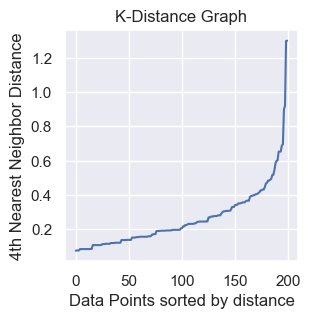

In [21]:
from sklearn.neighbors import NearestNeighbors

# Determine the optimal value of eps using k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 4], axis=0)  # Focus on the 5th neighbor
plt.figure(figsize=(3,3))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()



In [22]:
pip install hdbscan


   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/732.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/732.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/732.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 732.2/732.2 kB 836.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import hdbscan

# HDBSCAN clustering
hdbscan_cluster = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit(X_scaled)
hdbscan_labels = hdbscan_cluster.labels_

# Compute Silhouette Score (ignoring noise points)
core_mask = hdbscan_labels != -1
if core_mask.any():
    hdbscan_score = silhouette_score(X_scaled[core_mask], hdbscan_labels[core_mask])
    print(f"HDBSCAN Silhouette Score: {hdbscan_score}")
else:
    hdbscan_score = -1
    print("HDBSCAN could not form any valid clusters.")


HDBSCAN Silhouette Score: 0.601769872934346


In [24]:
from sklearn.decomposition import PCA

# Reduce data to 2D for better clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply HDBSCAN on reduced data
hdbscan_cluster_pca = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit(X_pca)
hdbscan_labels_pca = hdbscan_cluster_pca.labels_

core_mask_pca = hdbscan_labels_pca != -1
if core_mask_pca.any():
    hdbscan_score_pca = silhouette_score(X_pca[core_mask_pca], hdbscan_labels_pca[core_mask_pca])
    print(f"HDBSCAN Silhouette Score (PCA Reduced): {hdbscan_score_pca}")
else:
    print("HDBSCAN (PCA) could not form any valid clusters.")


HDBSCAN Silhouette Score (PCA Reduced): 0.6017698729330757
